In [35]:
# 1.3

import numpy as np

# ReLu Function
relu = np.vectorize(lambda z: np.fmax(0,z))

# Softmax Function
def softmax(x):
    return np.exp(x)/(np.exp(x).sum(axis=0))

def ff_nn_2_ReLu(x,W1,W2,V,b1,b2,c):
    a1 = np.dot(W1,x) + b1
    h1 = relu(a1)
    a2 = np.dot(W2,h1) + b2
    h2 = relu(a2)
    a3 = np.dot(V,h2) + c
    y = softmax(a3)
    return y

In [36]:
X = np.array([[1,0,0],[-1,-1,1]])
W1 = np.array([[1,0],[-1,0],[0,.5]])
W2 = np.array([[1,0,0],[-1,-1,0]])
V = np.array([[1,1],[0,0],[-1,-1]])
b1 = np.array([[0],[0],[1]])
b2 = np.array([[1],[-1]])
c = np.array([[1],[0],[0]])

class_probabilities = ff_nn_2_ReLu(X,W1,W2,V,b1,b2,c)

class_probabilities

array([[0.94649912, 0.84379473, 0.84379473],
       [0.04712342, 0.1141952 , 0.1141952 ],
       [0.00637746, 0.04201007, 0.04201007]])

In [93]:
# In sample 1, the probability for class 1 is 0.946, the probability for class 2 is 0.047, the probability for class 3 is 0.0064
# In sample 2 the probability for class 1 is 0.8438, the probability for class 2 is 0.1142, the probability for class 3 is 0.04201
# In sample 3 the probability for class 1 is 0.8438, the probability for class 2 is 0.1142, the probability for class 3 is 0.04201

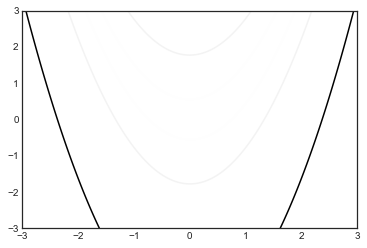

In [94]:
# 2.2

import matplotlib.pyplot as plt
import numpy as np
import random

x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2 + 100*(Y-X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.logspace(-0.5,3.5,5,base=10))
plt.show()

In [95]:
# 3.3
def grad_f(vector):
    x, y = vector
    df_dx = 400*x**3-400*x*y+2*x-2
    df_dy = 200*(y - x**2)
    return np.array([df_dx, df_dy])

In [96]:
def grad_descent(starting_point = None, iterations = 10, learning_rate = 5):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10, 10, size = 2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


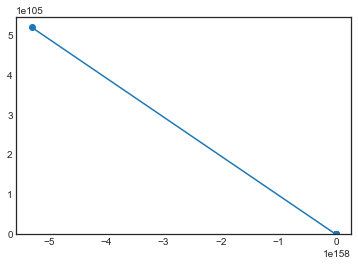

In [97]:
# Learning rate 0.01
np.random.seed(10)
traj = grad_descent(starting_point = [2.0, -2.0], iterations = 500, learning_rate = 0.01)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.logspace(-0.5,3.5,5,base=10))
x = traj[:, 0]
y = traj[:, 1]
plt.plot(x, y, '-o')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


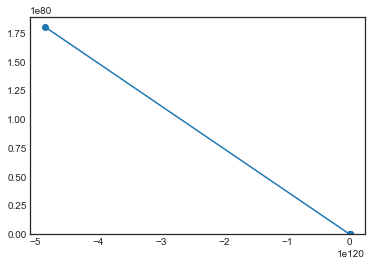

In [98]:
# Learning rate 0.005
np.random.seed(10)
traj = grad_descent(starting_point = [2.0, -2.0], iterations = 5000, learning_rate = 0.005)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.logspace(-0.5,3.5,5,base=10))
x = traj[:, 0]
y = traj[:, 1]
plt.plot(x, y, '-o')

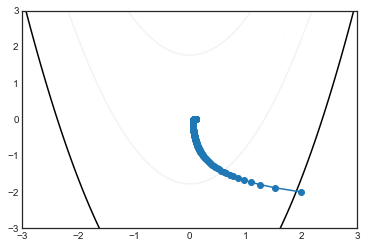

In [99]:
# Learning rate 0.0001
np.random.seed(10)
traj = grad_descent(starting_point = [2.0, -2.0], iterations = 500, learning_rate = 0.0001)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.logspace(-0.5,3.5,5,base=10))
x = traj[:, 0]
y = traj[:, 1]
plt.plot(x, y, '-o')

In [55]:
# 2.4

def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        # use information from previous gradient value
        v = alpha*v + epsilon*grad 
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


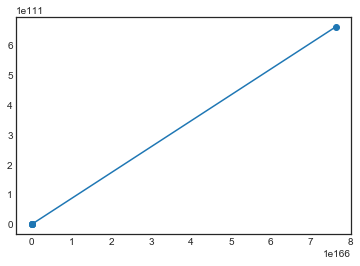

In [59]:
# alpha = .001, epsilon = 1

np.random.seed(10)
traj = grad_descent_with_momentum(iterations=10, alpha=.001, epsilon=1)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


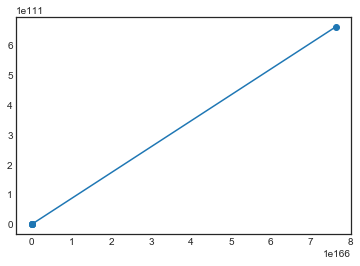

In [69]:
# alpha = .0001, epsilon = .01

np.random.seed(10)
traj = grad_descent_with_momentum(iterations=10, alpha=.0001, epsilon=0.01)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

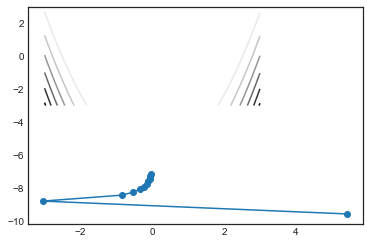

In [70]:
# alpha = 0.0001, epsilon = 0.0001

np.random.seed(10)
traj = grad_descent_with_momentum(iterations=10, alpha=0.0001, epsilon=0.0001)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [29]:
# 3.2

def drelu(x):
    return np.where(x>0,1,0)

def forward(x,W1,b1,W2,b2,V,c):
    z1 = x@W1.T+b1.T
    a1 = relu(z1)
    z2 = a1@W2.T +b2.T
    a2 = relu(z2)
    z3 = a2@V.T+c.T
    a3 = np.apply_along_axis(softmax,1,z3)
    return z1,a1,z2,a2,z3,a3

def loss(y_hat, y):
    total = y*np.log(y_hat)
    return -total.sum()

In [30]:
def grad_f(x,W1,b1,W2,b2,V,c,ys):
    
    z1,a1,z2,a2,z3,y = forward(x,W1,b1,W2,b2,V,c)
    
    new_W1 = np.zeros((3,2))
    new_b1 = np.zeros((3,1))
    new_W2 = np.zeros((2,3))
    new_b2 = np.zeros((2,1))
    new_V = np.zeros((3,2))
    new_c = np.zeros((3,1))
    
    for i in range(x.shape[0]):
        f3 = (y[i].reshape(3,1) - ys[i].reshape(3,1))
      
        new_c += f3
        new_V +=  f3@a2[i].reshape(1,2)
        f2 = V.T@f3*drelu(z2[i].reshape(2,1))
        new_b2 += f2
        new_W2 += f2@a1[i].reshape(1,3)
        f1 = W2.T@f2*drelu(z1[i].reshape(3,1))
        new_b1 += f1
        new_W1 += f1@x[i].reshape(1,2)
    
    new_W1 /= x.shape[0]
    new_b1 /= x.shape[0]
    new_W2  /= x.shape[0]
    new_b2  /= x.shape[0]
    new_V  /= x.shape[0]
    new_c  /= x.shape[0]
    
    return [new_W1,new_b1,new_W2,new_b2,new_V,new_c,y]

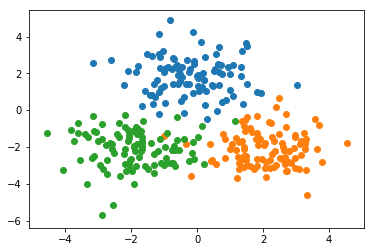

In [31]:
# 3.3

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12)
mu1 = np.array([0,2])
mu2 = np.array([2,-2])
mu3 = np.array([-2,-2])
sigma = np.array([[1,0],[0,1]])
a = np.random.multivariate_normal(mean = mu1, cov = sigma, size = 100)
b = np.random.multivariate_normal(mean = mu2, cov = sigma, size = 100)
c = np.random.multivariate_normal(mean = mu3, cov = sigma, size = 100)
x = np.concatenate([a,b,c])
y1 = np.array([[1,0,0] for i in range(100)])
y2 = np.array([[0,1,0] for i in range(100)])
y3 = np.array([[0,0,1] for i in range(100)])
y = np.concatenate([y1,y2,y3])
plt.scatter(a[:,0], a[:,1])
plt.scatter(b[:,0], b[:,1])
plt.scatter(c[:,0], c[:,1])
plt.show()

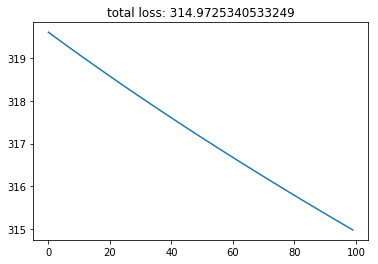

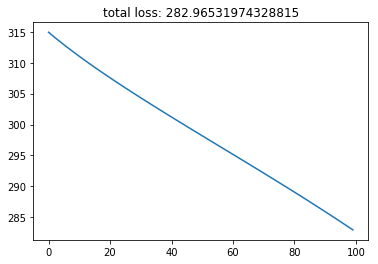

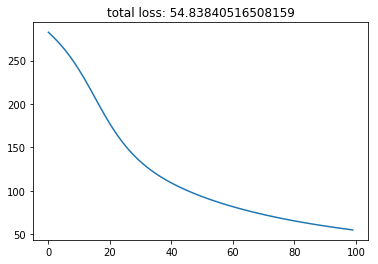

In [32]:
# 3.4

def gradient_descent(x,y,weights,iterations,learning_rate):
    losses = []
    for i in range(iterations):
        gradients = grad_f(x,*weights, y)
        losses.append(loss(gradients[-1],y))
        gradients = gradients[:-1]
        for j in range(len(weights)):
            weights[j]-= learning_rate*gradients[j]
    plt.plot(list(range(iterations)), losses)
    plt.title('total loss: '+str(losses[-1]))
    plt.show()

np.random.seed(10)
w1 =np.random.uniform(size =(3,2))
b1 = np.random.uniform(size = (3,1))
w2 = np.random.uniform(size =(2,3))
b2 = np.random.uniform(size = (2,1))
V =np.random.uniform(size =(3,2))
c =np.random.uniform(size = (3,1))
weights = [w1,b1,w2,b2,V,c]


gradient_descent(x,y,weights,100,0.001)
gradient_descent(x,y,weights,100,0.01)
gradient_descent(x,y,weights,100,0.1)

In [81]:
# According to the plot above, as learning rate goes higher, total loss decreases, the covergency of loss goes faster

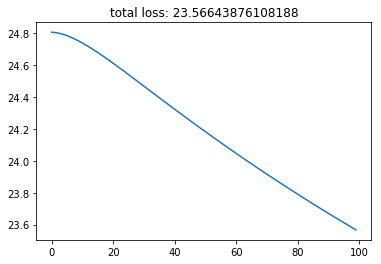

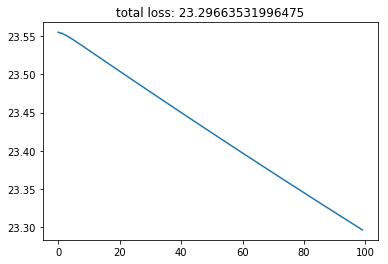

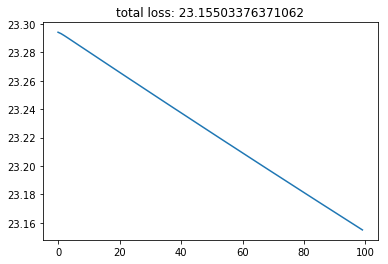

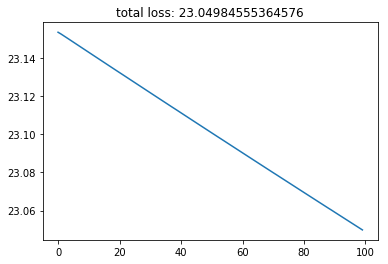

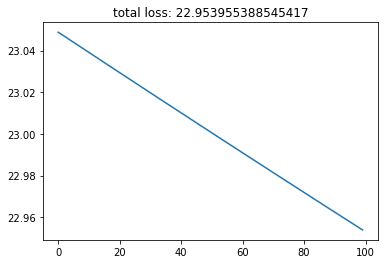

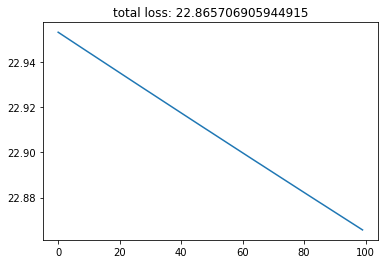

In [39]:
np.random.seed(1234)
def gradient_descent_momentum(x,y,weights, iterations, learning_rate, momentum):
    losses = []
    ms= [np.zeros(i.shape) for i in weights]
    for i in range(iterations):
        gradients = grad_f(x,*weights,y)
        losses.append(loss(gradients[-1],y))
        gradients = gradients[:-1]
        
        for j in range(len(weights)):
            ms[j] = momentum*ms[j]+gradients[j]*learning_rate
            weights[j]-= ms[j]

    plt.plot(list(range(iterations)), losses)
    plt.title('total loss: '+str(losses[-1]))
    plt.show()

gradient_descent_momentum(x,y,weights,100, 0.01, 0.9)
gradient_descent_momentum(x,y,weights,100, 0.01, 0.6)
gradient_descent_momentum(x,y,weights,100, 0.01, 0.3)
gradient_descent_momentum(x,y,weights,100, 0.01, 0.1)
gradient_descent_momentum(x,y,weights,100, 0.01, 0.05)
gradient_descent_momentum(x,y,weights,100, 0.01, 0.002)

In [86]:
# By looking at the plots using the Momentum method and the plots using normal gradient descent,
# we can say that the Momentum method will converges efficiently if we choose the momentum properly. 
# In this example, as momentum goes lower, total loss decreases.